In [1]:
from tensorairspace.envs.f16.linear_longitudial import LinearLongitudinalF16

In [2]:
import numpy as np

def unit_step(x):
    return np.deg2rad(5) * (x > 1000)

In [3]:
t0 = 0  # Начальное время
tn = 20  # Время моделирования
dt = 0.01  # Дискретизация
number_time_steps = int(((tn - t0) / dt) + 1)  # Количество шагов моделирования
time = list(np.arange(0, number_time_steps * dt, dt)) # Массив с шагов dt
t = np.linspace(-0, len(time), len(time))

reference_signals =  np.reshape(unit_step(t),  [1, -1])

In [4]:
import gym 
env = gym.make('LinearLongitudinalF16-v0',
               number_time_steps=number_time_steps, 
               initial_state=[[0],[0],[0],[0]],
               reference_signal = reference_signals,
              tracking_states=["alpha"])

In [5]:
env.reset()

In [6]:
from tensorairspace.agent.ihdp.model import IHDPAgent

In [7]:
actor_settings = {
    "start_training": 5,
    "layers": (25, 1), 
    "activations":  ('tanh', 'tanh'), 
    "learning_rate": 2, 
    "learning_rate_exponent_limit": 10,
    "type_PE": "combined",
    "amplitude_3211": 15, 
    "pulse_length_3211": 5/dt, 
    "maximum_input": 25,
    "maximum_q_rate": 20,
    "WB_limits": 30,
    "NN_initial": 120,
    "cascade_actor": False,
    "learning_rate_cascaded":1.2
}

In [8]:
incremental_settings = {
    "number_time_steps": number_time_steps, 
    "dt": dt, 
    "input_magnitude_limits":25, 
    "input_rate_limits":60,
}

In [9]:
critic_settings = {
    "Q_weights": [8], 
    "start_training": -1, 
    "gamma": 0.99, 
    "learning_rate": 15, 
    "learning_rate_exponent_limit": 10,
    "layers": (25,1), 
    "activations": ("tanh", "linear"), 
        "WB_limits": 30,
    "NN_initial": 120,
    "indices_tracking_states": env.indices_tracking_states
}

In [10]:
env.tracking_states

['alpha']

In [11]:
env.state_space

['alpha', 'q']

In [12]:
env.control_space

['stab']

In [13]:
model = IHDPAgent(actor_settings, critic_settings, incremental_settings, env.tracking_states, env.state_space, env.control_space, number_time_steps, env.indices_tracking_states)

[0]


2022-01-28 12:14:40.958593: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-01-28 12:14:40.999708: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-28 12:14:41.000013: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: GeForce RTX 3070 Laptop GPU computeCapability: 8.6
coreClock: 1.56GHz coreCount: 40 deviceMemorySize: 7.79GiB deviceMemoryBandwidth: 417.29GiB/s
2022-01-28 12:14:41.000179: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2022-01-28 12:14:41.001154: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2022-01-28 12:14:41.002345: I tensorflow/stream_executor/

In [14]:
from tqdm import tqdm

In [15]:
xt = np.array([[np.deg2rad(3)], [0]])

for step in tqdm(range(number_time_steps)):
    ut = model.predict(xt, reference_signals, step)
    xt, reward, done, info = env.step(np.array(ut))

100%|██████████| 2001/2001 [00:27<00:00, 73.80it/s]


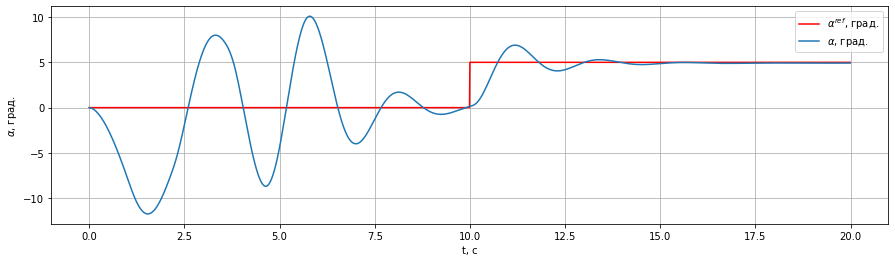

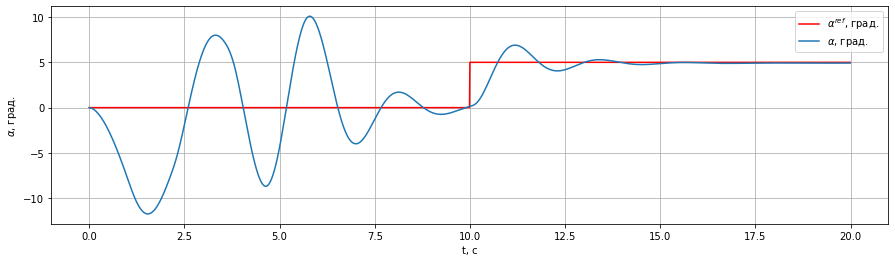

In [20]:
env.model.plot_transient_process('alpha', time , reference_signals[0], to_deg=True, figsize=(15,4))

/home/m9bit/PycharmProjects/TensorAirSpace/tensorairspace/aircraftmodel/model/base.py:151: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lang == 'rus':


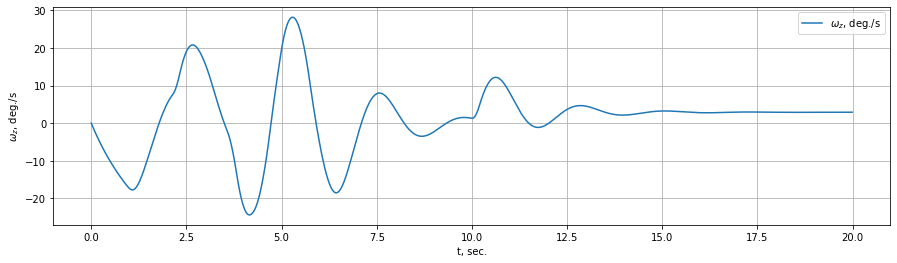

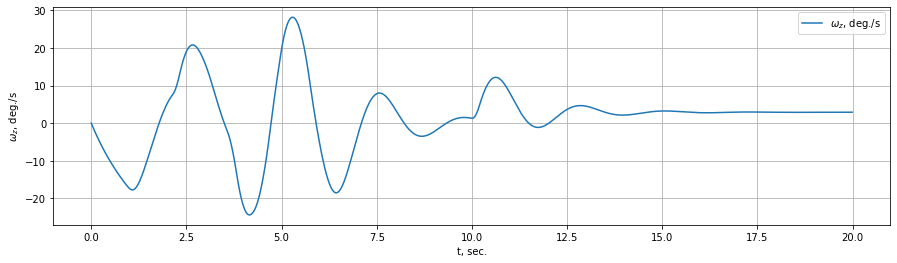

In [22]:
env.model.plot_state('wz', time , reference_signals[0], to_deg=True, figsize=(15,4))